# K-Means Clustering with Shogun

In [3]:
require 'shogun'
require 'gnuplot'
require 'csv'

true

In [5]:
csv = CSV.read('../datasets/birth.data', { converters: [:float]})
data = NArray.to_na(csv)
data = data.transpose(1,0)

NArray.object(70,3): 
[ [ "ALGERIA", "CONGO", "EGYPT", "GHANA", "IVORY COAST", "MALAGASY", ... ], 
  [ 36.4, 37.3, 42.1, 55.8, 56.1, 41.8, 46.1, 41.7, 41.4, 35.8, 34.0, ... ], 
  [ 14.6, 8.0, 15.3, 25.6, 33.1, 15.8, 18.7, 10.1, 19.7, 8.5, 11.0, ... ] ]

In [6]:
features = Shogun::RealFeatures.new
features.set_feature_matrix(data[true,1..2])

k = 2

distance = Shogun::EuclideanDistance.new(features, features)
kmeans = Shogun::KMeans.new(k, distance)
kmeans.train()

result = kmeans.apply()

#<Shogun::MulticlassLabels:0x00000001a3eca0 @__swigtype__="_p_shogun__CMulticlassLabels">

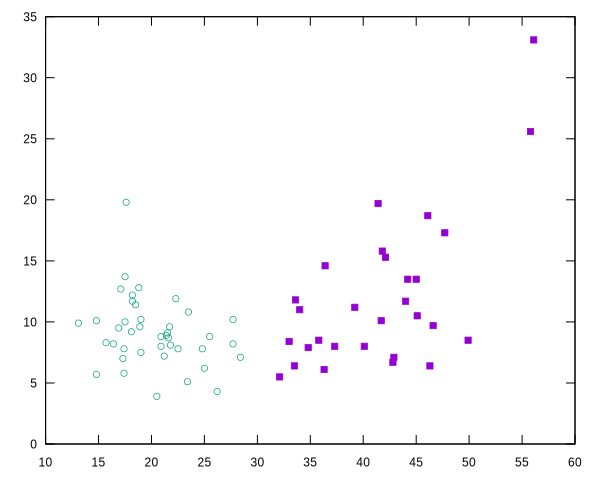

In [7]:
positives, negatives = [], []
(1..features.get_num_vectors).each do |i|
  if result.get_label(i-1) == 1.0
    positives << features.get_feature_vector(i-1).to_a
  else
    negatives << features.get_feature_vector(i-1).to_a
  end
end
Gnuplot::Plot.new do |plot|
  plot.data << Gnuplot::DataSet.new(positives.transpose) do |ds|
    ds.with = "points pt 5 ps 0.7"
    ds.notitle
  end
  plot.data << Gnuplot::DataSet.new(negatives.transpose) do |ds|
    ds.with = "points pt 6 ps 0.7"
    ds.notitle
  end
end